In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset
diabetes_ds = pd.read_csv('Healthcare-Diabetes.csv')

In [3]:
diabetes_ds.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Remove irrelevant columns(ID)
clean_df = diabetes_ds.copy()
clean_df.drop('Id', axis=1, inplace=True)

In [5]:
#Check duplicated rows
print("{:.3}% of rows are duplicated.".format(clean_df.duplicated().sum() / clean_df.shape[0] * 100))

71.9% of rows are duplicated.


In [6]:
#remove duplicated rows 
clean_df = clean_df[~clean_df.duplicated()]
clean_df.shape

(778, 9)

In [7]:
# handling missing values
clean_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
clean_df.head

<bound method NDFrame.head of       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
3               1       89             66             23       94  28.1   
4               0      137             40             35      168  43.1   
...           ...      ...            ...            ...      ...   ...   
2332            1      100             62              0        0  64.4   
2333            0      163             40             23       64  40.7   
2334            6      139             84             37        0  50.7   
2335            2      167             44             30      140  52.7   
2336            3      162              0            110      215  48.7   

      DiabetesPedigreeFunction  Age  Outcome  
0                     

In [9]:
#create csv file that contain clean dataset
clean_df.to_csv("clean_df.csv")

In [10]:
diabetes_ds.shape

(2768, 10)

In [11]:
clean_df['Outcome'].value_counts()

Outcome
0    506
1    272
Name: count, dtype: int64

In [12]:
# Split data and label
X = clean_df.drop(columns='Outcome', axis=1)
Y = clean_df['Outcome']

In [13]:
print(X)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
3               1       89             66             23       94  28.1   
4               0      137             40             35      168  43.1   
...           ...      ...            ...            ...      ...   ...   
2332            1      100             62              0        0  64.4   
2333            0      163             40             23       64  40.7   
2334            6      139             84             37        0  50.7   
2335            2      167             44             30      140  52.7   
2336            3      162              0            110      215  48.7   

      DiabetesPedigreeFunction  Age  
0                        0.627   50  
1                      

In [14]:
print(Y)

0       1
1       0
2       1
3       0
4       1
       ..
2332    0
2333    0
2334    1
2335    0
2336    0
Name: Outcome, Length: 778, dtype: int64


In [15]:
# Standarization data
scaler = StandardScaler()

In [16]:
scaler.fit(X)

StandardScaler()

In [17]:
standarized_data = scaler.transform(X)

In [18]:
print(standarized_data)

[[ 0.6486755   0.83830307  0.15542408 ...  0.17228436  0.47016374
   1.41349017]
 [-0.8400252  -1.13227804 -0.15291405 ... -0.68029232 -0.36628193
  -0.19921527]
 [ 1.24415578  1.93307035 -0.25569342 ... -1.08222133  0.60654076
  -0.11433604]
 ...
 [ 0.6486755   0.55679148  0.77210034 ...  2.2550074  -0.46023054
   1.41349017]
 [-0.54228506  1.43260531 -1.28348718 ...  2.49860074 -0.06019131
  -0.45385297]
 [-0.24454492  1.27620998 -3.54463345 ...  2.01141406  0.14588951
  -0.79336991]]


In [19]:
X = standarized_data
Y = clean_df['Outcome']

In [20]:
print(X)
print(Y)

[[ 0.6486755   0.83830307  0.15542408 ...  0.17228436  0.47016374
   1.41349017]
 [-0.8400252  -1.13227804 -0.15291405 ... -0.68029232 -0.36628193
  -0.19921527]
 [ 1.24415578  1.93307035 -0.25569342 ... -1.08222133  0.60654076
  -0.11433604]
 ...
 [ 0.6486755   0.55679148  0.77210034 ...  2.2550074  -0.46023054
   1.41349017]
 [-0.54228506  1.43260531 -1.28348718 ...  2.49860074 -0.06019131
  -0.45385297]
 [-0.24454492  1.27620998 -3.54463345 ...  2.01141406  0.14588951
  -0.79336991]]
0       1
1       0
2       1
3       0
4       1
       ..
2332    0
2333    0
2334    1
2335    0
2336    0
Name: Outcome, Length: 778, dtype: int64


In [21]:
# Split data training and data testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape,)

(778, 8) (622, 8) (156, 8)


In [23]:
# Training data with SVM Algoritm
classifier = svm.SVC(kernel='linear')

In [24]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [25]:
# Evaluate
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [26]:
print('Training Akurasi = ', training_data_accuracy)

Training Akurasi =  0.7797427652733119


In [27]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print('Testing Akurasi = ', test_data_accuracy)

Testing Akurasi =  0.7435897435897436


In [29]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def evaluate(classifier):
    print(confusion_matrix(Y_test, X_test_prediction))
    print(classification_report(Y_test, X_test_prediction))
    N, train_score, validation_score = learning_curve(classifier, X_train, Y_train, cv=5, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 5))
    plt.figure(figsize=(10,7))
    plt.title("F1 score")
    plt.plot(N, train_score.mean(axis=1), label="Train score")
    plt.plot(N, validation_score.mean(axis=1), label="Validation score")
    plt.legend()
    plt.show()

[[90 11]
 [29 26]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       101
           1       0.70      0.47      0.57        55

    accuracy                           0.74       156
   macro avg       0.73      0.68      0.69       156
weighted avg       0.74      0.74      0.73       156



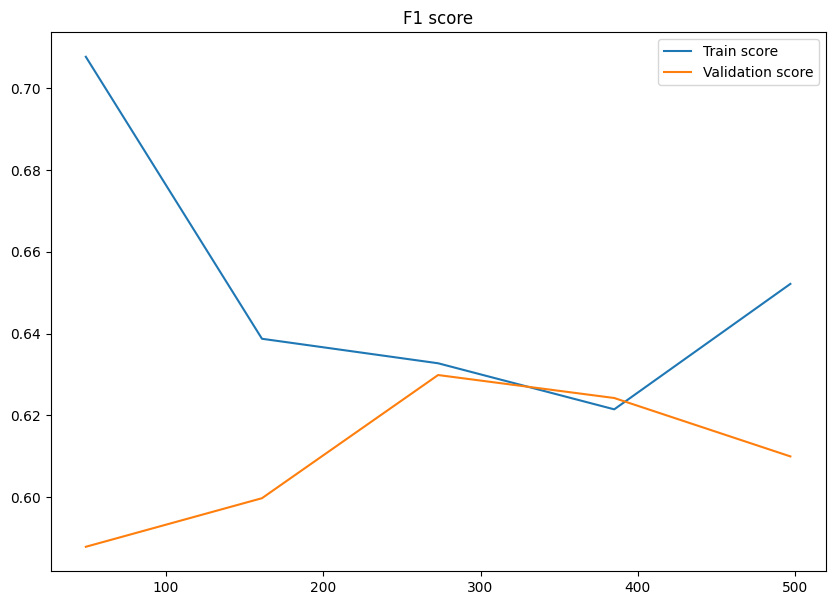

In [30]:
evaluate(classifier)

In [31]:
#Create model prediction
input_data = (0, 137, 40, 35, 168, 43.1, 2.288, 33)
input_data_as_np_array = np.array(input_data)
input_data_reshape = input_data_as_np_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshape)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('Pasien tidak terkena diabetes')
else :
    print('Pasien terkena diabetes')


[[-1.13776534  0.49423335 -1.48904593  0.87237669  0.76158039  1.32935272
   5.5039908  -0.0294568 ]]
[1]
Pasien terkena diabetes


d:\Streamlit\stenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
import pickle

In [33]:
filename = 'diabetes_models.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [34]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)